# Homework 7: Mixtures of Bernoulli distributions

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

In this homework you will implement the EM algorithm for mixtures of Bernoulli distributions. This model is also known as [*latent class analysis*](https://en.wikipedia.org/wiki/Latent_class_model). As well as being of practical importance on its own right, understading this model and its learning also lay the fundation for **hidden Markov models (HMMs)** over discrete variables. HMMs will be dicussed in future course sessions.



### Mixtures of Bernoulli distributions

Consider a set of i.i.d. $D$-dimensional binary (0-1) vectors. Examples of this kind of data are binary images, binary detection results, or genetic markers. Consider also a mixture of multinomials (or multivariate Bernoullis) model for each of the vectors, $\mathbf{x}$,

$$\displaystyle p(\mathbf{x} | \boldsymbol{\Theta},\mathbf{\pi} ) = \sum_{k=1}^K \pi_k p_k(\mathbf{x}^{(i)}|\boldsymbol{\theta}_k) = \sum_{k=1}^K \pi_k \prod_{j=1}^D \theta_{jk}^{x_{j}} (1-\theta_{jk})^{1-x_{j}},$$
where $\boldsymbol{\Theta}=[\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_K]$. If we are given a data set $\mathbf{X}=\{\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(N)}\}$ then the log likelihood function for this model is given by

\begin{align}
\log p(\mathbf{X}|\boldsymbol{\Theta},\mathbf{\pi}) = \sum_{i=1}^N \log\left(\sum_{k=1}^D \pi_k p(\mathbf{x}^{(i)}|\boldsymbol{\theta}_k)\right)
\end{align}

To prevent overfitting, we will also use a **prior distribution** for the model parameters. For $\boldsymbol{\Theta}$ we have

\begin{align}
\theta_{jk}&\sim\text{Beta}(\alpha,\beta)\\
p(\boldsymbol{\Theta}) &= \prod_{k=1}^{K} \prod_{j=1}^D p(\theta_{jk})\\
p(\theta_{jk}) &= \frac{\theta_{jk}^{\alpha-1}(1-\theta_{jk})^{\beta-1}}{\text{B}(\alpha,\beta)},
\end{align}
where $\text{B}(\alpha,\beta)$ is the [Beta function](https://en.wikipedia.org/wiki/Beta_function). Check [here](https://en.wikipedia.org/wiki/Beta_distribution) for more details about the Beta distribution.

For $\mathbf{\pi}$ we use a uniform [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution):
\begin{align}
\mathbf{\pi}&\sim \text{Dir}(\frac{1}{K}, \ldots, \frac{1}{K}) \Rightarrow p(\mathbf{\pi}) =\frac{1}{\text{B}(\frac{1}{K}, \ldots, \frac{1}{K})}\prod_{k=1}^{K}\pi_k^{\frac{1}{K}-1},
\end{align}
where $\text{B}(\frac{1}{K}, \ldots, \frac{1}{K})$ is the multivariate Beta function.


### EM learning

We now derive the EM algorithm for maximizing the posterior distribution $p(\mathbf{\Theta},\mathbf{\pi}|\mathbf{X})$. To do this, we introduce an explict discrete latent variable $z\in\{1,\ldots,K\}$ assoacted to each data point $\mathbf{x}$:
\begin{align}
p(\mathbf{x},z) = \prod_{k=1}^{K} \left(\pi_k ~p_{k}(\mathbf{x})\right)^{\mathbb{1} [z==k]}, ~~ p(z)=\prod_{k=1}^K \pi_k^{\mathbb{1} [z==k]}
\end{align}

#### Complete log-likelihood

We write the complete data log-likelihood as follows:
\begin{align}
\log p(\mathbf{X},\mathbf{z}|\boldsymbol{\Theta},\mathbf{\pi})=\sum_{i=1}^{N}\sum_{k=1}^{K}\mathbb{1} [z^{(i)}==k]\left(\log \pi_k + \sum_{j=1}^D \left[x_{j}^{(i)}\log\theta_k+(1-x_{j}^{(i)})\log(1-\theta_k)\right]\right)
\end{align}

#### Posterior distribution of $\mathbf{z}$ given $\boldsymbol{\Theta},\mathbf{\pi}$

In the $E$, we compute the expected complete data log-likelihood w.r.t. posterior distribution of $\mathbf{z}$ given the current values of $\boldsymbol{\Theta},\mathbf{\pi}$:
\begin{align}
p(z^{(i)}=k|\mathbf{x}^{(i)},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)}) \triangleq r_{ik} = \frac{\pi_{(k,t-1)} p_k(\mathbf{x}|\boldsymbol{\theta}_k) }{\sum_{q=1}^K \pi_{(q,t-1)} p_k(\mathbf{x}^{(i)}|\boldsymbol{\theta}_q)}, ~~~ k=1,\ldots, K
\end{align}

#### E-step
It is easy to show that
\begin{align}
\mathcal{Q}(\boldsymbol{\Theta},\mathbf{\pi},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})&=\mathbb{E}_{p(\mathbf{z}|\mathbf{X}^{(i)},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})}[\log p(\mathbf{X},\mathbf{z}|\boldsymbol{\Theta},\mathbf{\pi})]\\
&=\sum_{i=1}^{N}\sum_{k=1}^K r_{ik} \left(\log \pi_k + \sum_{j=1}^D \left[x_{j}^{(i)}\log\theta_k+(1-x_{j}^{(i)})\log(1-\theta_k)\right]\right)
\end{align}

#### M-step

We have to find
\begin{align}
\boldsymbol{\Theta}_t,\mathbf{\pi}_t = \arg \max_{\boldsymbol{\Theta},\mathbf{\pi}} ~~\mathcal{Q}(\boldsymbol{\Theta},\mathbf{\pi},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})+ \log p(\boldsymbol{\Theta})+\log p(\mathbf{\pi})
\end{align}

As a result, one can prove that the maximum is attained at

\begin{align}
r_k &\triangleq \sum_{i=1}^N r_{ik} \\\\
\pi^t_k &= \frac{r_k+\frac{1}{K}-1}{N+1-K}\\\\
\boldsymbol{\theta}_k &= \frac{\sum_{i=1}^N r_{ik}\mathbf{x}^{(i)}+\alpha-1}{r_k+\alpha+\beta-2} 
\end{align}

To see details about the derivation of this result, check out chapter 9 of Bishop's book. Also Chapter 11 of Murphy's book.

## Implementation of the E-step

Wryte a Python function that evaluates the responsibilities $r_{ik}$, $i=1,\ldots,N$, $k=1,\ldots,K$ for each data point. It should take as input the current values of $\boldsymbol{\pi}$, $\boldsymbol{\Theta}$, and the matrix $\mathbf{X}$ of observations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal as mvn
from scipy.stats import bernoulli

%matplotlib inline

In [2]:

# COMPLETE THE FOLLOWING FUNCTION, which takes the whole matrix of data points and the vector 
# of probabilites of a single cluster. The function must return the probability of each data 
# point given cluster parameters p(x|theta_k)
def eval_bern_pdf(X,Thetak):
    P = np.prod(bernoulli.pmf(X, Thetak),axis=1)
    return P

# COMPLETE THE FOLLOWING FUNCTION, which takes the whole matrix of data points, the vector 
# of probabilites of a single cluster and the cluster probabilites. The function must return 
# the matrix of responsibilites

def responsibilities(X,P,Theta,K):
    N,D = X.shape
    R = np.zeros([N,K])
    n= np.zeros([N,K])
    for k in range(K):
        n[:,k]=P[k]*eval_bern_pdf(X,Theta[k])
    d=np.sum(n,axis=1)
    for i in range(len(d)):
        R[i,:]= n[i,:]/d[i]
    return R
        

In [3]:
#Test your code with the following example

N = 2
D = 5
K = 3

np.random.seed(10)

X = np.random.randint(0,2,[N,D])

# X should be equal to (we have fixed the seed) 
# [[1 1 0 1 0]
#  [1 1 0 1 1]]

#print(X)
Theta = np.random.rand(K,D)
#print(Theta)
P = np.random.rand(K,1)
P /= np.sum(P)

R = responsibilities(X,P,Theta,K)

# R should be a [N,K] matrix with the following values
# [[  2.20811374e-02   2.19873976e-01   7.58044887e-01]
#  [  7.49839314e-04   3.34167429e-01   6.65082732e-01]]


In [4]:
print"The responsabilities are:\n{}".format(R)

The responsabilities are:
[[  2.20811374e-02   2.19873976e-01   7.58044887e-01]
 [  7.49839314e-04   3.34167429e-01   6.65082732e-01]]


## Implementation of the M step

In [5]:
# COMPLETE THE FOLLOWING FUNCTION, which computes the the soft number of points 
# associated to each cluster given the matrix R

def points_cluster(R):
    Rk = np.sum(R,axis=0)
    return Rk

# COMPLETE THE FOLLOWING FUNCTION, which updates the value of the cluster probabilites

def new_P(R,N):
    P = (points_cluster(R)+1/len(R[0])-1)/(N*1-len(R[0]))
    return P

def new_Theta(R,X,K,alpha,beta):
    
    Theta = np.zeros([K,D])
    Rk = points_cluster(R)
    
    for k in range(K):
        Theta[k,:] = (np.sum(R[:,k]*np.transpose(X),axis=1)+alpha-1)/(Rk[k]+alpha+beta-2)
    
    return Theta



In [6]:
alpha = 2.
beta = 2.

Theta = new_Theta(R,X,K,alpha,beta)

print"The new theta values are:\n{}".format(Theta)

# Theta should be a [K,D] matrix with the following values
# [[ 0.50564332  0.50564332  0.49435668  0.50564332  0.49472737]
# [ 0.60846367  0.60846367  0.39153633  0.60846367  0.52237502]
#  [ 0.70786949  0.70786949  0.29213051  0.70786949  0.48642146]]



The new theta values are:
[[ 0.50564332  0.50564332  0.49435668  0.50564332  0.49472737]
 [ 0.60846367  0.60846367  0.39153633  0.60846367  0.52237502]
 [ 0.70786949  0.70786949  0.29213051  0.70786949  0.48642146]]


## Computing the log-likelihood

In [7]:
# COMPLETE THE FOLLOWING FUNCTION, which computes the model log-likelihood 
# given the model parameters

def log_lik(X,P,Theta,K):
    
    LL = 0.
    
    for k in range(K):

        LL += P[k]*eval_bern_pdf(X,Theta[k])
        
    return np.sum(np.log(LL)) #Your code here


In [8]:
#For the toy example the LL should be -5.31111037373

print(log_lik(X,P,Theta,K))

-5.31111037373


## EM for a synthetic dataset

Let's generate samples from a mixtures of Bernoulli distributions and run the EM algorithm to recover the true model parameters.

In [9]:
## True model parameters
K = 5
D = 100
N = 5000
X = []


Theta_true = np.random.rand(K,D)
P_true = np.random.rand(K,1)
P_true /= np.sum(P_true)

N_Z_true = np.random.multinomial(N,P_true.reshape([-1,]))

for k in range(K):
    X.append(np.random.rand(N_Z_true[k],D)<=Theta_true[k,:])
    #print(X[k].shape)

X = np.concatenate(X)

In [10]:
## EM initialization
K = 5

P = np.ones([K,1])*1.0/K
P /= np.sum(P_true)

# Uniform initializaiton for Theta in the range [0.2,0.8]
Theta = np.random.uniform(0.2,0.8,size=[K,D]) 

Num_Iter = 100

alpha = 0.2
beta = 0.2

LL = np.zeros([Num_Iter,1])

for i in range(Num_Iter):
    R = responsibilities(X,P,Theta,K)
    P = new_P(R,N)
    Theta = new_Theta(R,X,K,alpha,beta)
    LL[i] = log_lik(X,P,Theta,K)
    print('Iteration', i)

    

('Iteration', 0)
('Iteration', 1)
('Iteration', 2)
('Iteration', 3)
('Iteration', 4)
('Iteration', 5)
('Iteration', 6)
('Iteration', 7)
('Iteration', 8)
('Iteration', 9)
('Iteration', 10)
('Iteration', 11)
('Iteration', 12)
('Iteration', 13)
('Iteration', 14)
('Iteration', 15)
('Iteration', 16)
('Iteration', 17)
('Iteration', 18)
('Iteration', 19)
('Iteration', 20)
('Iteration', 21)
('Iteration', 22)
('Iteration', 23)
('Iteration', 24)
('Iteration', 25)
('Iteration', 26)
('Iteration', 27)
('Iteration', 28)
('Iteration', 29)
('Iteration', 30)
('Iteration', 31)
('Iteration', 32)
('Iteration', 33)
('Iteration', 34)
('Iteration', 35)
('Iteration', 36)
('Iteration', 37)
('Iteration', 38)
('Iteration', 39)
('Iteration', 40)
('Iteration', 41)
('Iteration', 42)
('Iteration', 43)
('Iteration', 44)
('Iteration', 45)
('Iteration', 46)
('Iteration', 47)
('Iteration', 48)
('Iteration', 49)
('Iteration', 50)
('Iteration', 51)
('Iteration', 52)
('Iteration', 53)
('Iteration', 54)
('Iteration', 55)
('

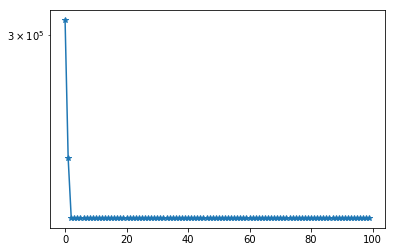

In [11]:
# Plot the evolution of the negative LL. It should always decrease!

plt.semilogy(-LL,'-*')  

Text(0.5,1,u'Cluster Probabilites')

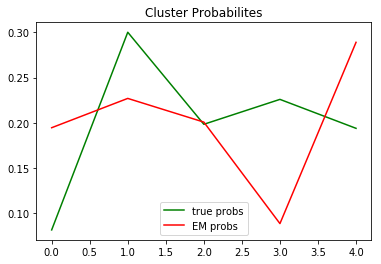

In [12]:
plt.plot(P_true,label='true probs', color = [0, 0.5, 0])
plt.plot(P,label='EM probs', color = [1, 0, 0])
plt.legend()
plt.title('Cluster Probabilites')

## EM for a data set of handwritten digits

Load and run the EM over the [sklearn dataset of digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). Each datapoint is a 8x8 image of a digit.

(1797L, 64L)


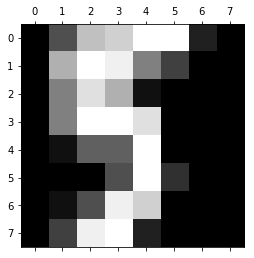

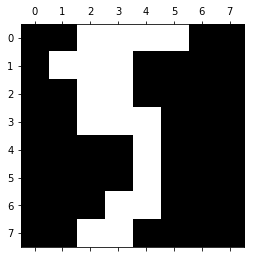

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()    #Gray scale, we have to binarize
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[15]) 
plt.show()

#Binarization

Bin_Images = np.copy(digits.images)

val_min=np.min(Bin_Images)
val_max=np.max(Bin_Images)

Bin_Images = (Bin_Images - val_min) / (val_max - val_min)

Bin_Images = np.round(Bin_Images)

plt.gray() 
plt.matshow(Bin_Images[15]) 
plt.show()


('Iteration', 0)
('Iteration', 1)
('Iteration', 2)
('Iteration', 3)
('Iteration', 4)
('Iteration', 5)
('Iteration', 6)
('Iteration', 7)
('Iteration', 8)
('Iteration', 9)
('Iteration', 10)
('Iteration', 11)
('Iteration', 12)
('Iteration', 13)
('Iteration', 14)
('Iteration', 15)
('Iteration', 16)
('Iteration', 17)
('Iteration', 18)
('Iteration', 19)
('Iteration', 20)
('Iteration', 21)
('Iteration', 22)
('Iteration', 23)
('Iteration', 24)
('Iteration', 25)
('Iteration', 26)
('Iteration', 27)
('Iteration', 28)
('Iteration', 29)
('Iteration', 30)
('Iteration', 31)
('Iteration', 32)
('Iteration', 33)
('Iteration', 34)
('Iteration', 35)
('Iteration', 36)
('Iteration', 37)
('Iteration', 38)
('Iteration', 39)
('Iteration', 40)
('Iteration', 41)
('Iteration', 42)
('Iteration', 43)
('Iteration', 44)
('Iteration', 45)
('Iteration', 46)
('Iteration', 47)
('Iteration', 48)
('Iteration', 49)
('Iteration', 50)
('Iteration', 51)
('Iteration', 52)
('Iteration', 53)
('Iteration', 54)
('Iteration', 55)
('

('Iteration', 437)
('Iteration', 438)
('Iteration', 439)
('Iteration', 440)
('Iteration', 441)
('Iteration', 442)
('Iteration', 443)
('Iteration', 444)
('Iteration', 445)
('Iteration', 446)
('Iteration', 447)
('Iteration', 448)
('Iteration', 449)
('Iteration', 450)
('Iteration', 451)
('Iteration', 452)
('Iteration', 453)
('Iteration', 454)
('Iteration', 455)
('Iteration', 456)
('Iteration', 457)
('Iteration', 458)
('Iteration', 459)
('Iteration', 460)
('Iteration', 461)
('Iteration', 462)
('Iteration', 463)
('Iteration', 464)
('Iteration', 465)
('Iteration', 466)
('Iteration', 467)
('Iteration', 468)
('Iteration', 469)
('Iteration', 470)
('Iteration', 471)
('Iteration', 472)
('Iteration', 473)
('Iteration', 474)
('Iteration', 475)
('Iteration', 476)
('Iteration', 477)
('Iteration', 478)
('Iteration', 479)
('Iteration', 480)
('Iteration', 481)
('Iteration', 482)
('Iteration', 483)
('Iteration', 484)
('Iteration', 485)
('Iteration', 486)
('Iteration', 487)
('Iteration', 488)
('Iteration'

('Iteration', 869)
('Iteration', 870)
('Iteration', 871)
('Iteration', 872)
('Iteration', 873)
('Iteration', 874)
('Iteration', 875)
('Iteration', 876)
('Iteration', 877)
('Iteration', 878)
('Iteration', 879)
('Iteration', 880)
('Iteration', 881)
('Iteration', 882)
('Iteration', 883)
('Iteration', 884)
('Iteration', 885)
('Iteration', 886)
('Iteration', 887)
('Iteration', 888)
('Iteration', 889)
('Iteration', 890)
('Iteration', 891)
('Iteration', 892)
('Iteration', 893)
('Iteration', 894)
('Iteration', 895)
('Iteration', 896)
('Iteration', 897)
('Iteration', 898)
('Iteration', 899)
('Iteration', 900)
('Iteration', 901)
('Iteration', 902)
('Iteration', 903)
('Iteration', 904)
('Iteration', 905)
('Iteration', 906)
('Iteration', 907)
('Iteration', 908)
('Iteration', 909)
('Iteration', 910)
('Iteration', 911)
('Iteration', 912)
('Iteration', 913)
('Iteration', 914)
('Iteration', 915)
('Iteration', 916)
('Iteration', 917)
('Iteration', 918)
('Iteration', 919)
('Iteration', 920)
('Iteration'

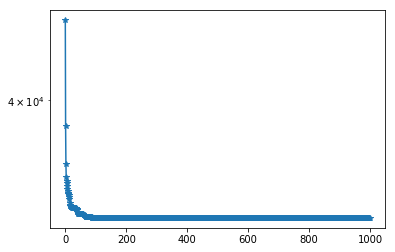

In [14]:
# EM 

K = 10
D = 64
X = Bin_Images.reshape([-1,D])

P = np.ones([K,1])*1.0/K
P /= np.sum(P_true)

# Uniform initializaiton for Theta in the range [0.2,0.8]
Theta = np.random.uniform(0.2,0.8,[K,D])

Num_Iter = 1000

alpha = 2.
beta = 2.

LL = np.zeros([Num_Iter,1])

for i in range(Num_Iter):
    R = responsibilities(X,P,Theta,K)
    P = new_P(R,N)
    Theta = new_Theta(R,X,K,alpha,beta)
    LL[i] = log_lik(X,P,Theta,K)
    print('Iteration',i)

# Plot the evolution of the negative LL. It should always decrease!
plt.semilogy(-LL,'-*')  


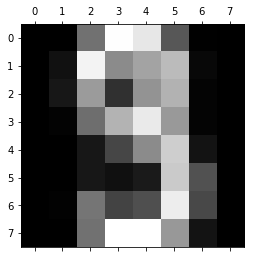

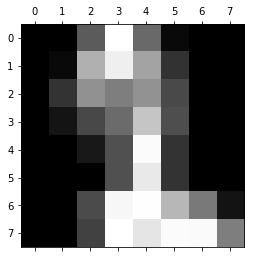

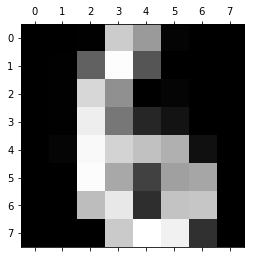

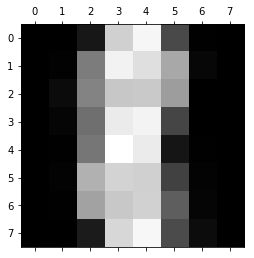

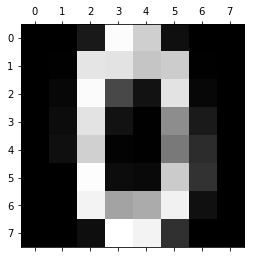

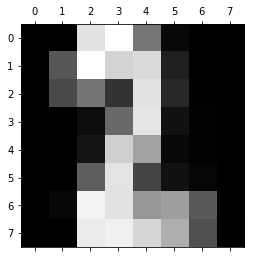

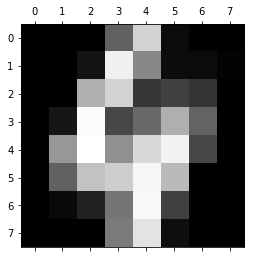

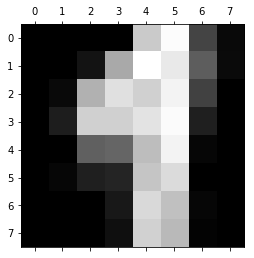

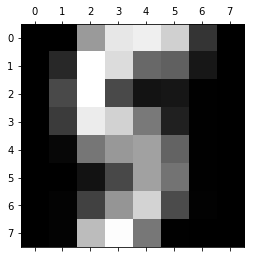

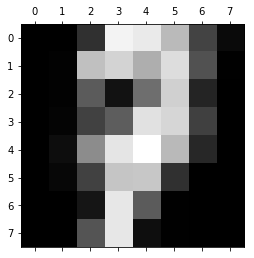

In [38]:
# Plot as a 8x8 gray-scale image each theta_k vector
# (it represents the probability of each pixel to take value 1)


for k in range(K):
    plt.gray() 
    plt.matshow(Theta[k,:].reshape([8,8])) 
    plt.show()

## EM for the MNIST Database (optional)

Repeat the experiment for the MNIST Database. Take $10^4$ images **at random**, and binarize the database.


In [15]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [ ]:
images = mnist.data  #70000 images


plt.gray() 
plt.matshow(images[0,:].reshape([28,28])) 
plt.show()

val_min=np.min(images)
val_max=np.max(images)

Bin_Images = (images - val_min) / (val_max - val_min)

Bin_Images = np.round(Bin_Images)

plt.gray() 
plt.matshow(Bin_Images[0,:].reshape([28,28])) 
plt.show()

mask = np.random.permutation(Bin_Images.shape[0])

Bin_Images = Bin_Images[mask,:]

In [ ]:
# EM 

K = 10
D = 784
N = 1000

X = Bin_Images[:N,:]

P = np.ones([K,1])*1.0/K
P /= np.sum(P_true)

# Uniform initializaiton for Theta in the range [0.2,0.8]
Theta = #Your code here 

Num_Iter = 1000

alpha = 2.
beta = 2.

LL = np.zeros([Num_Iter,1])

for i in range(Num_Iter):
    #Your code here

In [ ]:
# Plot the evolution of the negative LL. It should always decrease!
plt.semilogy(-LL,'-*')  

In [ ]:
# Plot as a 8x8 gray-scale image each theta_k vector
# (it represents the probability of each pixel to take value 1)


for k in range(K):
    plt.gray() 
    plt.matshow(Theta[k,:].reshape([28,28])) 
    plt.show()